In [1]:
import sympy

In [2]:
# !pip install graphviz sympy
# !sudo apt install graphviz

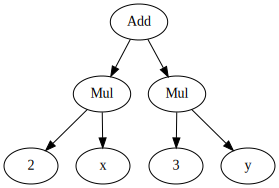

In [3]:
import sympy as sp
from sympy.printing.dot import dotprint
import graphviz

def plot_expression_tree(expr, filename='expression_tree'):
    # Generate the dot format representation of the expression tree
    dot_str = dotprint(expr)
    
    # Use graphviz to create and render the tree from the dot string
    dot = graphviz.Source(dot_str)
    
    # Render the graph to a file (e.g., PNG or PDF)
    dot.render(filename, format='png', cleanup=True)

    return dot


def plot_expression_tree_with_args(expr, filename='expression_tree'):
    # Generate the dot format representation of the expression tree
    dot_str = dotprint(expr, with_labels=True)
    
    # Use graphviz to create and render the tree from the dot string
    dot = graphviz.Source(dot_str)
    
    # Render the graph to a file (e.g., PNG or PDF)
    dot.render(filename, format='png', cleanup=True)

    return dot

# Example usage:
# expr = sp.sympify("2*x + 3*y")
# plot_expression_tree(expr)

expr = sp.sympify("2*x + 3*y")
plot_expression_tree_with_args(expr)



# Direct Gameplay Recreation

In [4]:
import sympy as sp

def convert_to_int_if_possible(expr):
    evaluated_expr = expr.simplify()
    if evaluated_expr.is_Integer:
        return sp.Integer(evaluated_expr)
    return evaluated_expr

# Initialize players' numbers
player1 = None  # Player 1 starts with null set (None)
player2 = 9002  # Player 2 starts with 9002

# Step 1: Player 1 summons Euler's number e
print("# Player 1 turn")
print(f"Player 1 summons Euler's number")
player1 = sp.E
print(f"Player 1's number becomes: {player1}")
print("")

# Step 2: Player 2 activates natural log
print("# Player 2 turn")
print("Player 2 activates natural log on Player 1's number")
player1 = convert_to_int_if_possible(sp.log(player1))
print(f"Player 1's number becomes: {player1}")
print("")

# Step 4: Activates Probability: P (no effect given)
print("# Player 1 turn")
print("Player 1 activated Probability: P")
print("Player 1 activated Sample space: Ω")
print("Player 1 activated Linear Search") # Here they find some card
print("")

# Step 6: Player 1 activates Fundamental Theorem of Arithmetic (Factorizes Player 2's number)
# factors = sp.factorint(player2)
def prime_factor_expression(n):
    factors = sp.factorint(n)
    expr = [p for p, exp in factors.items() for _ in range(exp)]
    return sp.Mul(*sorted(expr), evaluate=False)

player2 = prime_factor_expression(player2)
print("Player 1 activates Fundamental Theorem of Arithmetic: Factorizes Player 2's number")
print(f"Player 2's number decomposed into prime factors: {player2}")
# display(plot_expression_tree(player2))
print("")

# Step 7: Player 1 activates Well-Ordering Principle to get the least element of Player 2's factors
def well_ordering_principle(expr):
    if isinstance(expr, (sp.Set, set)):
        elements = expr
    elif expr.is_commutative:
        elements = expr.args
    else:
        raise ValueError("The expression must be commutative.")
    return min(elements, key=lambda x: sp.default_sort_key(x))

print(f"Player 1 activated Well-Ordering Principle on Player 2")
player2 = well_ordering_principle(player2)
print(f"Player 2's number becomes: {player2}")
print("")

print("# Player 2 turn")
# print(f"Player 2 activate Complex Plane on all players") # Is this really needed?
def format_complex_parts(expression):
    real_part = sp.re(expression)
    imag_part = sp.im(expression)
    return(f"{real_part} + {imag_part}*I")

# print(f"Player 1 number becomes: {format_complex_parts(player1)}")
# print(f"Player 2 number becomes: {format_complex_parts(player2)}")

print(f"Player 2 activated 90° complex rotation on Player 1")
def complex_90_deg_rotation(expr):
    expr = sp.I * expr
    return expr

player1 = complex_90_deg_rotation(player1)
# print(f"Player 1 number becomes: {format_complex_parts(player1)}")
print(f"Player 1's number becomes: {player1}")

print(f"Player 2 activated real part on Player 1")
player1 = sp.re(player1)
# print(f"Player 1 number becomes: {format_complex_parts(player1)}")
print(f"Player 1's number becomes: {player1}")
print("")

print("# Player 1 turn")
print(f"Player 1 activated factorial")
player1 = sp.factorial(player1)
print(f"Player 1's number becomes: {player1}")
print("")



# Player 1 turn
Player 1 summons Euler's number
Player 1's number becomes: E

# Player 2 turn
Player 2 activates natural log on Player 1's number
Player 1's number becomes: 1

# Player 1 turn
Player 1 activated Probability: P
Player 1 activated Sample space: Ω
Player 1 activated Linear Search

Player 1 activates Fundamental Theorem of Arithmetic: Factorizes Player 2's number
Player 2's number decomposed into prime factors: 2*7*643

Player 1 activated Well-Ordering Principle on Player 2
Player 2's number becomes: 2

# Player 2 turn
Player 2 activated 90° complex rotation on Player 1
Player 1's number becomes: I
Player 2 activated real part on Player 1
Player 1's number becomes: 0

# Player 1 turn
Player 1 activated factorial
Player 1's number becomes: 1



# OOP

In [17]:
import sympy as sp

class Card:
    def __init__(self, name, effect):
        self.name = name
        self.effect = effect

    def play(self, target=None):
        return self.effect(target)


class Hand:
    def __init__(self):
        self.cards = []

    def add_card(self, card):
        self.cards.append(card)

    def play_card(self, card_name, target=None):
        for card in self.cards:
            if card.name == card_name:
                self.cards.remove(card)
                return card.play(target)
        raise ValueError(f"Card {card_name} not found in hand.")


class DiscardPile:
    def __init__(self):
        self.cards = []

    def add_card(self, card):
        self.cards.append(card)


class Player:
    def __init__(self, name):
        self.name = name
        self.number = None
        self.hand = Hand()
        self.discard_pile = DiscardPile()

    def summon_number(self, card_name):
        self.number = self.hand.play_card(card_name)
        self.discard_pile.add_card(Card(card_name, None))  # Add card to discard pile
        print(f"{self.name} summons {self.number}")

    def activate_card(self, card_name, target=None):
        if target is None:
            target = self.number
        result = self.hand.play_card(card_name, target.number)
        self.discard_pile.add_card(Card(card_name, None))  # Add card to discard pile
        target.number = result
        print(f"{self.name} activates {card_name} on {target.name}")

    def show_number(self):
        print(f"{self.name}'s number is now: {self.number}")


class Game:
    def __init__(self):
        self.players = []
        self.current_turn_player = None

    def add_player(self, player):
        self.players.append(player)

    def start_game(self):
        print("Game started!")
        for player in self.players:
            print(f"{player.name} has {len(player.hand.cards)} cards in hand.")

    def start_turn(self, player):
        self.current_turn_player = player
        print(f"\n# {player.name}'s turn started")

    def end_turn(self):
        print(f"# {self.current_turn_player.name}'s turn ended")
        self.current_turn_player = None


def convert_to_int_if_possible(expr):
    evaluated_expr = expr.simplify()
    if evaluated_expr.is_Integer:
        return sp.Integer(evaluated_expr)
    return evaluated_expr


# Define the effects of the cards
def summon_e_effect(target=None):
    return sp.E


def summon_9002_effect(target=None):
    return sp.Integer(9002)


def natural_log_effect(target):
    return convert_to_int_if_possible(sp.log(target))


def prime_factor_expression(n):
    factors = sp.factorint(n)
    expr = [p for p, exp in factors.items() for _ in range(exp)]
    return sp.Mul(*sorted(expr), evaluate=False)


def well_ordering_principle(expr):
    if isinstance(expr, (sp.Set, set)):
        elements = expr
    elif expr.is_commutative:
        elements = expr.args
    else:
        raise ValueError("The expression must be commutative.")
    return min(elements, key=lambda x: sp.default_sort_key(x))


def complex_90_deg_rotation(expr):
    return sp.I * expr

def real_part(expr):
    return sp.re(expr)


# Creating summon cards
summon_e_card = Card("Summon Euler's Number", summon_e_effect)
summon_9002_card = Card("Summon 9002", summon_9002_effect)

# Creating other cards
log_card = Card("Natural Log", natural_log_effect)
factorization_card = Card("Fundamental Theorem of Arithmetic", prime_factor_expression)
ordering_card = Card("Well-Ordering Principle", well_ordering_principle)
rotation_card = Card("90° Complex Rotation", complex_90_deg_rotation)
factorial_card = Card("Factorial", lambda x: sp.factorial(x))
real_part_card = Card("Real Part", real_part)

# Initialize players
player1 = Player("Player 1")
player2 = Player("Player 2")

# Add cards to player's hands directly
player1.hand.add_card(summon_e_card)
player1.hand.add_card(factorization_card)
player1.hand.add_card(ordering_card)
player1.hand.add_card(factorial_card)

player2.hand.add_card(summon_9002_card)
player2.hand.add_card(log_card)
player2.hand.add_card(rotation_card)
player2.hand.add_card(real_part_card)

# Initialize game and add players
game = Game()
game.add_player(player1)
game.add_player(player2)

# Start the game
game.start_game()

# Game Logic
game.start_turn(player1)
player1.summon_number("Summon Euler's Number")
game.end_turn()

game.start_turn(player2)
player2.summon_number("Summon 9002")
player2.activate_card("Natural Log", player1)
player1.show_number()
game.end_turn()

game.start_turn(player1)
player1.activate_card("Fundamental Theorem of Arithmetic", player2)
player2.show_number()

player1.activate_card("Well-Ordering Principle", player2)
player2.show_number()
game.end_turn()

game.start_turn(player2)
player2.activate_card("90° Complex Rotation", player1)
player1.show_number()

player2.activate_card("Real Part", player1)
player1.show_number()
game.end_turn()

game.start_turn(player1)
player1.activate_card("Factorial", player1)
player1.show_number()
game.end_turn()


Game started!
Player 1 has 4 cards in hand.
Player 2 has 4 cards in hand.

# Player 1's turn started
Player 1 summons E
# Player 1's turn ended

# Player 2's turn started
Player 2 summons 9002
Player 2 activates Natural Log on Player 1
Player 1's number is now: 1
# Player 2's turn ended

# Player 1's turn started
Player 1 activates Fundamental Theorem of Arithmetic on Player 2
Player 2's number is now: 2*7*643
Player 1 activates Well-Ordering Principle on Player 2
Player 2's number is now: 2
# Player 1's turn ended

# Player 2's turn started
Player 2 activates 90° Complex Rotation on Player 1
Player 1's number is now: I
Player 2 activates Real Part on Player 1
Player 1's number is now: 0
# Player 2's turn ended

# Player 1's turn started
Player 1 activates Factorial on Player 1
Player 1's number is now: 1
# Player 1's turn ended
